# Produces WC Map of Toronto, including all countries

In [9]:
import matplotlib as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from __future__ import (absolute_import, division, print_function)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

%matplotlib inline

In [10]:
# read csv file and work with this new file
eth_by_tract2 = pd.read_csv('EthByTract.csv')
eth_by_tract2 = eth_by_tract2.set_index('ALT_GEO_CODE')
eth_by_tract2 = eth_by_tract2.drop('Total - Ethnic origin for the population in private households - 25% sample data',1)
eth_by_tract2
eth_by_tract2


,English,French,Belgian,German,Swiss,Danish,Icelandic,Swedish,Polish,Russian,...,Nigerian,Senegalese,Egyptian,Moroccan,Tunisian,Iranian,Saudi Arabian,Japanese,Korean,Australian
ALT_GEO_CODE,,,,,,,,,,,,,,,,,,,,,
535000100,0.260870,0.086957,0.000000,0.078261,0.017391,0.017391,0.017391,0.017391,0.043478,0.017391,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000200,0.530769,0.046154,0.038462,0.192308,0.015385,0.015385,0.000000,0.000000,0.084615,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000300,0.120879,0.087912,0.000000,0.120879,0.021978,0.000000,0.000000,0.000000,0.043956,0.000000,...,0.000000,0.032967,0.021978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000400,0.149606,0.067717,0.001575,0.062205,0.004724,0.007087,0.001575,0.005512,0.060630,0.011811,...,0.001575,0.000000,0.001575,0.001575,0.001575,0.006299,0.000000,0.002362,0.004724,0.003150
535000500,0.160524,0.081081,0.000000,0.081081,0.003276,0.004914,0.001638,0.009009,0.065520,0.015561,...,0.000000,0.000000,0.004914,0.000000,0.000000,0.004914,0.000000,0.004914,0.007371,0.003276
535000701,0.178797,0.082278,0.004747,0.068038,0.003165,0.003165,0.000000,0.007911,0.044304,0.025316,...,0.000000,0.000000,0.004747,0.000000,0.000000,0.000000,0.000000,0.009494,0.004747,0.003165
535000702,0.132898,0.069717,0.005447,0.061002,0.002179,0.000000,0.000000,0.004357,0.054466,0.020697,...,0.002179,0.000000,0.003268,0.002179,0.000000,0.005447,0.000000,0.006536,0.004357,0.002179
535000801,0.184676,0.093648,0.004584,0.095612,0.004584,0.003274,0.002620,0.009168,0.058284,0.029470,...,0.004584,0.000000,0.006549,0.001310,0.000000,0.011133,0.000000,0.009168,0.020301,0.003929
535000802,0.166414,0.068285,0.004047,0.091047,0.003035,0.007081,0.001517,0.004552,0.045018,0.033890,...,0.005564,0.000000,0.011128,0.005058,0.000000,0.022256,0.000000,0.006576,0.011128,0.005058


In [11]:
# Iterates through dataframe to find max ethnicity per tract
temp_lst = []

for tract in eth_by_tract2.index:
    max_ethnicity = eth_by_tract2.loc[tract].idxmax()
    temp_lst.append([tract,max_ethnicity])
    
max_ethnicity_df = pd.DataFrame(np.array(temp_lst))
max_ethnicity_df = max_ethnicity_df.rename(columns={0:'ALT_GEO_CODE',1:'MaxEthnicity'})


# Alter ALT_GEO_CODE column to conform with census code names in the shapefile
max_ethnicity_df['ALT_GEO_CODE'] = (max_ethnicity_df['ALT_GEO_CODE'].astype(str).str[0:7] + '.' + max_ethnicity_df['ALT_GEO_CODE'].astype(str).str[7:9])
max_ethnicity_df = max_ethnicity_df.set_index('ALT_GEO_CODE')
max_ethnicity_df

,MaxEthnicity
ALT_GEO_CODE,
5350001.00,English
5350002.00,English
5350003.00,English
5350004.00,English
5350005.00,English
5350007.01,English
5350007.02,English
5350008.01,English
5350008.02,English


In [12]:
# Rename rows to match old census tracts
# Key, row to be renamed, name to give row
lst_of_renames = {'5350008.01':'5350008.00',
                 '5350012.03':'5350012.02',
                 '5350013.01':'5350013.00',
                 '5350028.01':'5350028.00',
                 '5350047.03':'5350047.01',
                 '5350050.03':'5350050.02',
                 '5350063.04':'5350063.01',
                 '5350063.03':'5350063.02',
                 '5350065.01':'5350065.00',
                 '5350096.01':'5350096.00',
                 '5350097.03':'5350097.02',
                 '5350012.04':'5350102.01',
                 '5350128.05':'5350128.03',
                 '5350139.01':'5350139.00',
                 '5350183.01':'5350183.00',
                 '5350195.01':'5350195.00',
                 '5350196.01':'5350196.00',
                 '5350200.01':'5350200.00',
                 '5350204.00':'5350205.00', 
                 '5350210.01':'5350210.00',
                 '5350213.02':'5350213.00',
                 '5350223.01':'5350223.00',
                 '5350260.06':'5350260.03',
                 '5350287.03':'5350287.01',
                 '5350290.01':'5350290.00',
                 '5350291.03':'5350291.01',
                 '5350308.03':'5350308.01',
                 '5350337.01':'5350337.00',
                 '5350355.05':'5350355.03',
                 '5350411.09':'5350411.20',
                 '5350412.22':'5350412.23',
                 '5350412.24':'5350413.00'}

In [13]:
# Appends a list of old census tracts and interpolates the max ethnicity value based
# on what it is for the new census tracts

for key,value in lst_of_renames.items():
    temp_df = pd.DataFrame([[value,max_ethnicity_df.loc[key]['MaxEthnicity']]],columns=['ALT_GEO_CODE','MaxEthnicity'])
    temp_df = temp_df.set_index('ALT_GEO_CODE')
    
    max_ethnicity_df = max_ethnicity_df.append(temp_df)

max_ethnicity_df

,MaxEthnicity
ALT_GEO_CODE,
5350001.00,English
5350002.00,English
5350003.00,English
5350004.00,English
5350005.00,English
5350007.01,English
5350007.02,English
5350008.01,English
5350008.02,English


# Mapping

In [14]:
# Hardcoded Dictionary Colours
ethnicity_colours = {'English':'#6f8cd2','Portuguese':'#ff0000','Iranian':'#009900','Polish':'#999999','Russian':'#33ccff',
                    'Spanish':'#ff6600','Korean':'#ff33cc','Egyptian':'#e6e600','Nigerian':'#99ff66','French':'#00ffcc',
                    'German':'#000000','Colombian':'#660033'}



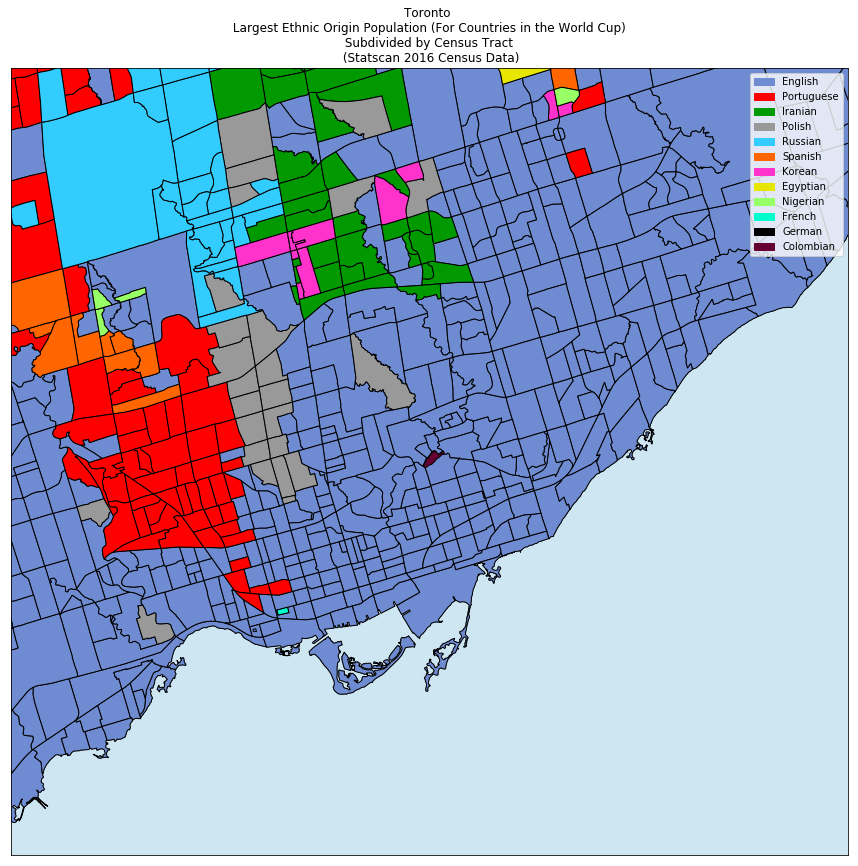

In [15]:
fig     = plt.figure(figsize=(15,15))
ax      = fig.add_subplot(111)

map = Basemap(llcrnrlon=-79.56,llcrnrlat=43.55,urcrnrlon=-79.124,urcrnrlat=43.85,
             resolution='i', projection='tmerc', lat_0 = 43.70, lon_0 = -79)
map.fillcontinents(color='#cee5f2',lake_color='#cee5f2')
map.readshapefile('gct_000b11a_e', 'statcan')

# Creates a dictionary in which to store patches to be displayed on the map
patches_dict = {}
for ethnicity in ethnicity_colours:
    patches_dict[ethnicity]=[]
    
# Iterate through shapefile, for each shape in Toronto add a patch to the
# list corresponding to max ethnicity in census tract
for info, shape in zip(map.statcan_info, map.statcan):
    if info['CTUID'] in max_ethnicity_df.index:
        patches_dict[max_ethnicity_df.loc[info['CTUID']]['MaxEthnicity']].append(Polygon(np.array(shape), True))

# Draw collection of patches representing different countries to the map
for ethnicity,ethnicity_patches in patches_dict.items():
    ax.add_collection(PatchCollection(ethnicity_patches,facecolor= ethnicity_colours[ethnicity], edgecolor='black' ,linewidths=1., zorder=2))

# Draws legend on map
lgd = []
for ethnicity in patches_dict:
    lgd.append(mpatches.Patch(color=ethnicity_colours[ethnicity], label=ethnicity))

plt.legend(handles=lgd)
plt.title('Toronto \n Largest Ethnic Origin Population (For Countries in the World Cup) \n Subdivided by Census Tract \n (Statscan 2016 Census Data)')

plt.show()

# Output as PNG

In [16]:
fig.savefig('WCMap.png',bbox_inches='tight',dpi=500)